## Introduction:
Problem Definition: Performing Multiclass classification to predict the Income Brackets of people from last years US Census data. Different models are used for this Multiclass classification problem to predict the income whether to $<50K , $ 50-100K or $>100K and analysis on accuracy of using these classifiers is presented in this notebook. Additionally advantages and disadvatages of using classification model to fill the categorical Missing vaues is discussed. Feature Engineering and Hypertuning of the classifiers is performed to improve overall Models accuracy.  

In [1013]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline
import time
import os

## 1. Data Preparation:
### Reading the data
Income-training and Income-testing datasets are imported into pandasdataframe. Pandas dataframe makes it easier and faster for data cleaning, modelling and all other susequent steps.  

In [1014]:
# changing the current working directory and importing data to pandas dataframes
os.chdir(r'\\SRVA\Homes$\pothulas\Desktop\Classification')
df_train=pd.read_csv('income-training.csv')
df_test =pd.read_csv('income-testing.csv')

### Primary Analysis of data sets:
#### Training Data:

In [1015]:
df_train.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [1016]:
df_train.shape

(24421, 15)

#### Training Data:

In [1017]:
df_test.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


In [1018]:
df_test.shape

(12211, 15)

### Data cleaning steps:
Data cleaning is an important step in any Data science project since the success and the prediction accuracy of projects heavily depends on the quality of prepared data.

Since our Data is Numerical and Categorical, Initially Datasets are checked for presence of Missing values

In [1019]:
df_train.isnull().sum()                              # Checking Training dataset for Missing Values

Age                 0
WorkClass        1384
FinalWeight         0
Education           0
EducationLvl        0
MaritalStatus       0
Occupation       1390
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HoursPerWeek        0
NativeCountry     395
IncomeBracket       0
dtype: int64

Age, Occupation and Occupation columns were identified to have Missing Values. 

Further, 
1. Number of Rows with all three Missing values & 
2.  Number of Rows having Occupation and WorkClass as Missing values are checked.

In [1020]:
df_Null = df_train[df_train['Occupation'].notnull() == df_train['WorkClass'].isnull()]
df_Null.shape

(6, 15)

### Missing Values:       <font color=blue>        || Insights || 
  
Since out of 1390 Missing Values for Occupation, it is Identified that 1384 Workclass Values are also Missing in the same rows. Since the Occupation and Workclass values are simultaneously Missing, It might be because some people might not have revealed their Job details

In [1021]:
df_AllNull = df_train.dropna(thresh=13)
df_AllNull.shape

(24403, 15)

It is Identified that there are only 18 rows in which all the Three i.e, (Occupation, WorkClass & Native Country are Missing).  Since they are only Marginal amount compared to whole data, these rows are Completely removed to avoid any Bias.

(Because if we use Mode or Model to predict the values in that case these rows will have three predicted features and may Bias the Training or Testing Data)

### Methodology for Replacing Missing Values:

If we use Mode of Categorical Data to replace the Missing values in that Case the Percentage of Accuracy be Percentage of that particular datapoint in the column. 
#### For Example: 
If we replace Native Country with Mode Data i.e, United-States we can be right 91.475 % Cases in general

Likewise, for WorkClass it is 73.80%
and for Occupation it is 13.47% as calculated below

In [1022]:
Native_country_Percent_values = df_train['NativeCountry'].value_counts(100)
Native_country_Percent_values = (Native_country_Percent_values*100).tolist()
print((Native_country_Percent_values[:5]))

[91.47590110713394, 2.0186464663281445, 0.6076750187297095, 0.3995671356030966, 0.3745941896279031]


In [1023]:
WorkClass_Percent_values = df_train['WorkClass'].value_counts(100)
WorkClass_Percent_values = (WorkClass_Percent_values*100).tolist()
print((WorkClass_Percent_values[:5]))

[73.80301254503625, 8.291010114164171, 6.83248686894995, 4.2453444458913925, 3.663671485002387]


In [1024]:
Occupation_Percent_values = df_train['Occupation'].value_counts(100)
Occupation_Percent_values = (Occupation_Percent_values*100).tolist()
print((Occupation_Percent_values[:5]))

[13.468802917806435, 13.455776996222482, 13.295123963353742, 12.300811949112065, 11.888324432286918]


### Logic for Filling Missing Data:

Since In Native Country, United States is occuring 91.475% of times. Therefore all missing Vlues in Native country column are replaced with United States.

But, In case of Workclass & Occupation accuracy is low hence a Model is used to predict these Missing values considering all other Data  as training for this case.

Details about how and Which Model is used and its accuracy are discussed below.

In [1025]:
def Remove_Multiple_Missings(df):                                  # Function for removing Rows with Multiple Missing Values
    df = df[df['Occupation'].isnull() == df['WorkClass'].isnull()]
    df =df.dropna(thresh=13) 
    df['NativeCountry'] = df['NativeCountry'].fillna(df['NativeCountry'].mode()[0])       # Native country replaced with Mode
    return df

In [1026]:
df_train = Remove_Multiple_Missings(df_train)                  # Calling Function to remove rows with Multiple Missing Values

In [1027]:
from sklearn.ensemble import GradientBoostingClassifier

### Model for replacing WorkClass Missing Values:

1. Initially Training/Testing Data with and without Workclass missing values is divided into separate Dataframes
2. Among the two seperate dataframes, the one without Missing values is used for Training of Model (Workclass as Target)
3. Gradient Boosting Model is used for Predicting the Missing values after confirming that it is giving better accuracy on data    for Missing Value classes
4. Model accuracy is calculated by spliting the Training dataframe (without Missing values) into separate test set
5. After building the Model, it is used for predicting Missing values and finally two dataframes are concatenated and returned


In [1028]:
def Add_Missing_WorkClass(df):
    
    df3 = df[pd.notnull(df['WorkClass'])]                   # Creating New dataframe with rows having no Workclass Missing values
    df_wc = df3
    
    df3['Occupation']=df3['Occupation'].apply(lambda x: str(x).replace('-', ''))
    df3['NativeCountry']=df3['NativeCountry'].apply(lambda x: str(x).replace('-', ''))
    
    df3 = df3.apply(LabelEncoder().fit_transform)           # Doing one Hot Encoding for data to train the Model
    df_wc['WorkClass'] = df3['WorkClass']
    df3.head()
    
    columns = ['MaritalStatus', 'Relationship', 'WorkClass','Occupation','IncomeBracket']
    y = df3["WorkClass"]
    X = df3.drop(columns, axis=1)
    X.head()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) #Creating test/Train split to check accuracy
    
    gb = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features= 'sqrt',subsample=0.8,random_state=10)

    gb.fit(X_train, y_train)
    
    gb_accuracy = gb.score(X_test, y_test)*100     
    print('The accuracy of the predicting Work class Missing Values with GradientBoosting Model is ' + str(gb_accuracy)+'%')
    
    df4 = df[pd.isnull(df['WorkClass'])]                    # Creating New dataframe with rows having Workclass Missing values
    df_nullwc = df4
    df4 = df4.apply(LabelEncoder().fit_transform)
    
    columns = ['MaritalStatus', 'Relationship', 'WorkClass','Occupation','IncomeBracket']
    X_pred = df4.drop(columns, axis=1)
    X_pred.head()
    
    df_nullwc['WorkClass'] = gb.predict(X_pred)
    
    frames = [df_wc, df_nullwc]
    df_new = pd.concat(frames)
    
    return df_new


In [1029]:
df_train = Add_Missing_WorkClass(df_train)                      # Calling function to predict Workclass Missing values

The accuracy of the predicting Work class Missing Values with GradientBoosting Model is 74.5604514869%


Here, We got Model Accuracy to be 74.560% for Predicting Missing values. If we have used Mode for predicting then we would have acheived only 73.8% accuracy (since Work class Mode value is repeated only present in 73.8% of whole Dataset)


Hence, this shows that using Model we get better prediction when compared to using Mode.

### Model for replacing WorkClass Missing Values:

Model is built with the same logic mentioed above like WorkClass case. Gradient boost Model is used for predicting the Missing Values.

In [1030]:
def Add_Missing_Occupation(df):
    
    df5 = df[pd.notnull(df['Occupation'])]
    df_wc = df5
    
    df5['Occupation']=df5['Occupation'].apply(lambda x: str(x).replace('-', ''))
    df5['NativeCountry']=df5['NativeCountry'].apply(lambda x: str(x).replace('-', ''))
    
    df5 = df5.apply(LabelEncoder().fit_transform)
    df_wc['Occupation'] = df5['Occupation']
    
    columns = ['MaritalStatus', 'Relationship','Occupation','IncomeBracket']
    y = df5["Occupation"]
    X = df5.drop(columns, axis=1)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    gb = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features= 'sqrt',subsample=0.8,random_state=10)

    gb.fit(X_train, y_train)
    
    gb_accuracy = gb.score(X_test, y_test)*100     
    print('The accuracy of the predicting Occupation Missing Values with GradientBoosting Model is ' + str(gb_accuracy)+'%')
    
    df6 = df[pd.isnull(df['Occupation'])]
    df_nullwc = df6
    df6 = df6.apply(LabelEncoder().fit_transform)
    
    columns = ['MaritalStatus', 'Relationship','Occupation','IncomeBracket']
    X_pred = df6.drop(columns, axis=1)
    X_pred.head()

    df_nullwc['Occupation'] = gb.predict(X_pred)
    
    frames = [df_wc, df_nullwc]
    df_new = pd.concat(frames)   
    
    return df_new

In [1031]:
df_train = Add_Missing_Occupation(df_train)

The accuracy of the predicting Occupation Missing Values with GradientBoosting Model is 35.5328847406%


Here, We got Model Accuracy to be 35.53 % for Predicting values. If we have used Mode for predicting Occupation Missing values, then we would have acheived only 13.46 % accuracy (since Occupatio - Mode value is repeated only present in 13.46 % of whole Dataset)


Hence, this shows that using Model we get better prediction when compared to using Mode.

In [1032]:
df_train.isnull().sum()                      # Checking final Data for Missing values after replacing them using Model

Age              0
WorkClass        0
FinalWeight      0
Education        0
EducationLvl     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
NativeCountry    0
IncomeBracket    0
dtype: int64

In [1033]:
df_train.shape   #Checking the shape of final Dataframe (we removed only 24 rows out of total which have Multiple Missing values)

(24397, 15)

#### Replacing Missing values in Testing Dataset:

We used same procedure as in case of Training Data for predicting and replacing Missing values in Testing Data.

In [1034]:
df_test.isnull().sum()                        # Checking Training dataset for Missing Values

Age                0
WorkClass        688
FinalWeight        0
Education          0
EducationLvl       0
MaritalStatus      0
Occupation       690
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry    225
IncomeBracket      0
dtype: int64

In [1035]:
df_test = Remove_Multiple_Missings(df_test)
df_test = Add_Missing_WorkClass(df_test)         # Calling functions to predict Workclass Missing values on Testing data sets
df_test = Add_Missing_Occupation(df_test)

The accuracy of the predicting Work class Missing Values with GradientBoosting Model is 73.1019522777%
The accuracy of the predicting Occupation Missing Values with GradientBoosting Model is 33.9262472885%


### Replcaing Missing Values:

Since we are not removing the Missing value rows which corresponds to nearly 5-6% of Data, hence we have more Data for Training which might imporve overall predictive power of model. (because of more Training Data)


Since our prediction accuracy of Missing values is greater than that of replacing with Mode, We can can be assured that our overrall predictions on Testing Data for Income may not be biased as compared to replacing with mode.

In [1036]:
df_train.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,5,179151,Some-college,10,Married-civ-spouse,4,Husband,White,Male,0,0,40,UnitedStates,<50K
1,28,2,68021,Some-college,10,Never-married,7,Not-in-family,White,Female,0,0,30,UnitedStates,<50K
2,24,2,233499,Some-college,10,Married-civ-spouse,13,Husband,White,Male,0,0,40,UnitedStates,50-100K
3,32,4,168782,9th,5,Married-civ-spouse,2,Husband,White,Male,0,0,32,UnitedStates,<50K
4,55,4,105582,Masters,14,Married-civ-spouse,11,Husband,White,Male,2228,0,50,UnitedStates,<50K


### Converting categorical data into numerical data: Encoding

In general for converting Categorical to Numerical data we have two methods:
1. OneHot Encoding (Creating Dummy variables)
2. Label Encoding

#### Label Encoding:
Pros:
1. It craetes a unique value for each and every categorical variable. therfore, it doensnt change number of features)
2. Since number of features is same it is computaionally faster than that of One hot encoding
Cons:
1. Because of the unique values, the model may be bias for certain values beacuse of high weightage(number) assigned to it


In [1037]:
df_train_label = df_train.apply(LabelEncoder().fit_transform)
df_train_label.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,25,5,8534,15,9,2,4,0,4,1,0,0,39,42,1
1,11,2,1853,15,9,4,7,1,4,0,0,0,29,42,1
2,7,2,12460,15,9,2,13,0,4,1,0,0,39,42,0
3,15,4,7580,6,4,2,2,0,4,1,0,0,31,42,1
4,38,4,3486,12,13,2,11,0,4,1,27,0,49,42,1


In [1038]:
columns = ['IncomeBracket']
y = df_train_label['IncomeBracket']
X = df_train_label.drop(columns, axis=1)


start_gb = time.time()

gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Gboost classifier with Label Encoding & 10 fold cross-validation is ' + str(gb_scores.mean()))

end_gb =time.time()
gb_time = (end_gb-start_gb)/60
print('The time taken for the classifier for 10 fold cross validation is ' + str(gb_time))

The accuracy of the Gboost classifier with Label Encoding & 10 fold cross-validation is 0.81399329101
The time taken for the classifier for 10 fold cross validation is 0.7439828872680664


#### One Hot Encoding:
Pros: 
Since each categorical variable is assigned 0/1 implies there is no weightage given to any particular categorical variable
Cons:
It might heavily increase the Dimensionality of Data because new feature is generated for each and every Categorical variable
Computaionally takes more time than before.



In [1039]:
y = df_train['IncomeBracket']
df_train_OneHot = df_train.drop(columns, axis=1)
df_train_OneHot = pd.get_dummies(df_train_OneHot)
df_train_OneHot.head()
X = df_train_OneHot

start_gb = time.time()

gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Gboost classifier with OneHot Encoding & 10 fold cross-validation is ' + str(gb_scores.mean()))

end_gb =time.time()
gb_time = (end_gb-start_gb)/60
print('The time taken for the classifier for 10 fold cross validation is ' + str(gb_time))



The accuracy of the Gboost classifier with OneHot Encoding & 10 fold cross-validation is 0.81485393022
The time taken for the classifier for 10 fold cross validation is 2.4478423873583477


### 2. Exploratory data analysis:

### Univariate Analysis of Numerical data:

In [1040]:
df_train.describe()

,Age,WorkClass,FinalWeight,EducationLvl,Occupation,CapitalGain,CapitalLoss,HoursPerWeek
count,24397.000000,24397.000000,2.439700e+04,24397.000000,24397.000000,24397.000000,24397.000000,24397.000000
mean,38.645079,2.198016,1.908707e+05,10.100791,5.968439,1074.476042,90.679961,40.504980
std,13.655960,0.934930,1.066260e+05,2.579568,3.954424,7375.680623,410.377413,12.359369
min,17.000000,0.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,2.000000,1.182350e+05,9.000000,3.000000,0.000000,0.000000,40.000000
50%,37.000000,2.000000,1.783630e+05,10.000000,6.000000,0.000000,0.000000,40.000000
75%,48.000000,2.000000,2.394090e+05,13.000000,9.000000,0.000000,0.000000,45.000000
max,90.000000,6.000000,1.490400e+06,16.000000,13.000000,99999.000000,4356.000000,99.000000


From the above univariate analysis, we can get insights about average Age , Average Eduaction level of the people in the United States.

### Pair Plot:

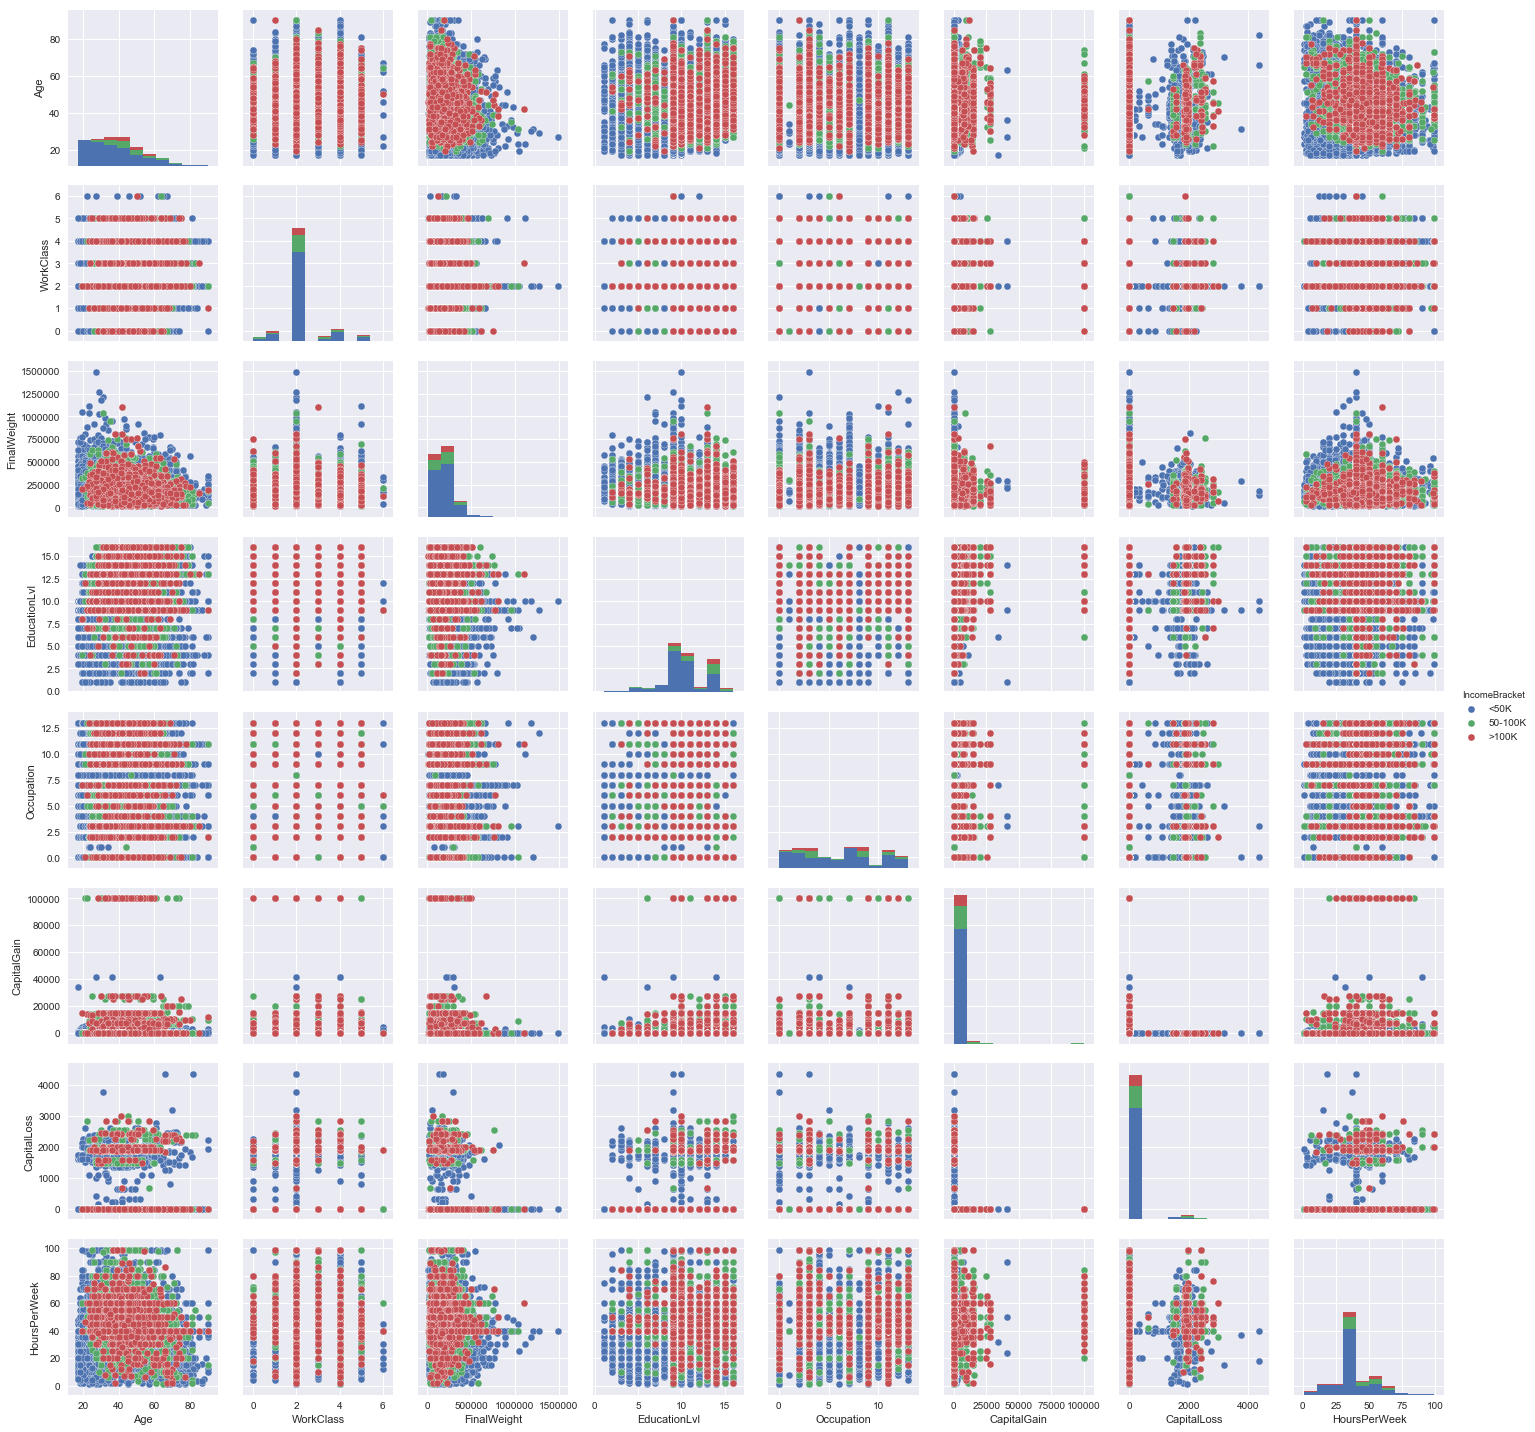

In [209]:
sns.pairplot(df_train,hue='IncomeBracket')

Above pair plot is generated so as to identify presence of any variable with strong correlations. But it can be said that there are no numerical variables taht are strongly correlated.

Also, since different colors in above pairplot indicates the three differenet income levels, In pair plots of Education we can see that Red points(High income group) are more concentrated with people having more education in general. To further analyze these individual graphs are plotted for them

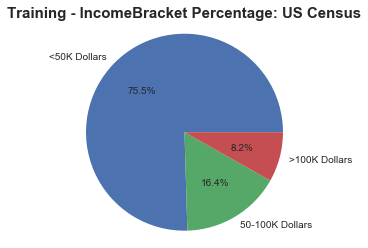

In [210]:
x = df_train['IncomeBracket'].value_counts()
x.tolist()
IncomeBracket = ['<50K Dollars', '50-100K Dollars', '>100K Dollars']
piechart = plt.pie(x,  labels = IncomeBracket, autopct = '%1.1f%%')
plt.title('Training - IncomeBracket Percentage: US Census', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

Above plot is drawn to get insights about Training Data on different Income brackets. Since most of the Income bracket range is found to be in <$50K (75.5%)  Implies this serves like a Zero R Model:

#### Zero R Model: 

It is the simplest of classification methods which relies on the target and ignores all predictors. 
Implies it  predicts the majority class only. 

In our case it will only predict <$50K income bracket for all the values and it is 75.5% right

Thefore, it can be used as a baseline performance benchmark for other classification methods

Our Target is to achieve Accuracy greater than this.

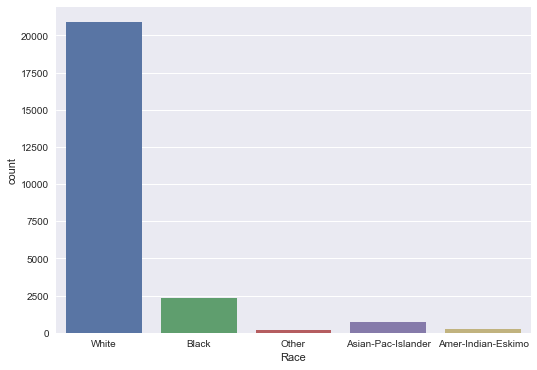

In [215]:
a4_dims = (8.5, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df_train.Race,label="Race")  

### Highly Repeated Data Values:
From the above Bar plot it is clear that Most of the Data we have people belonging to Race white.

Insights:

We can remove this Feature since in most of the cases it is same category (White) And hence implies low predictive power which needs to be further verified in Feature Importance Plots.

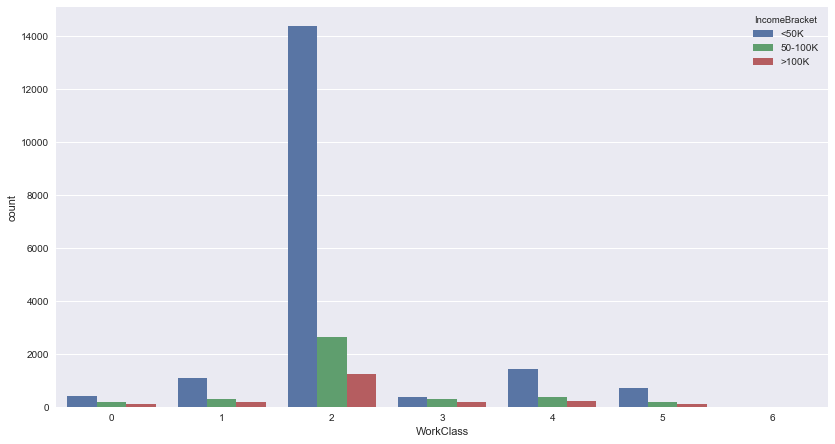

In [221]:
a4_dims = (11.7, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='WorkClass', hue="IncomeBracket", data=df_train)
plt.tight_layout() 

Above plot explains that, Most of the people are working in Private Jobs. And we can see that all Work class categories have  income in <$50K followed by 50-100K and >100K

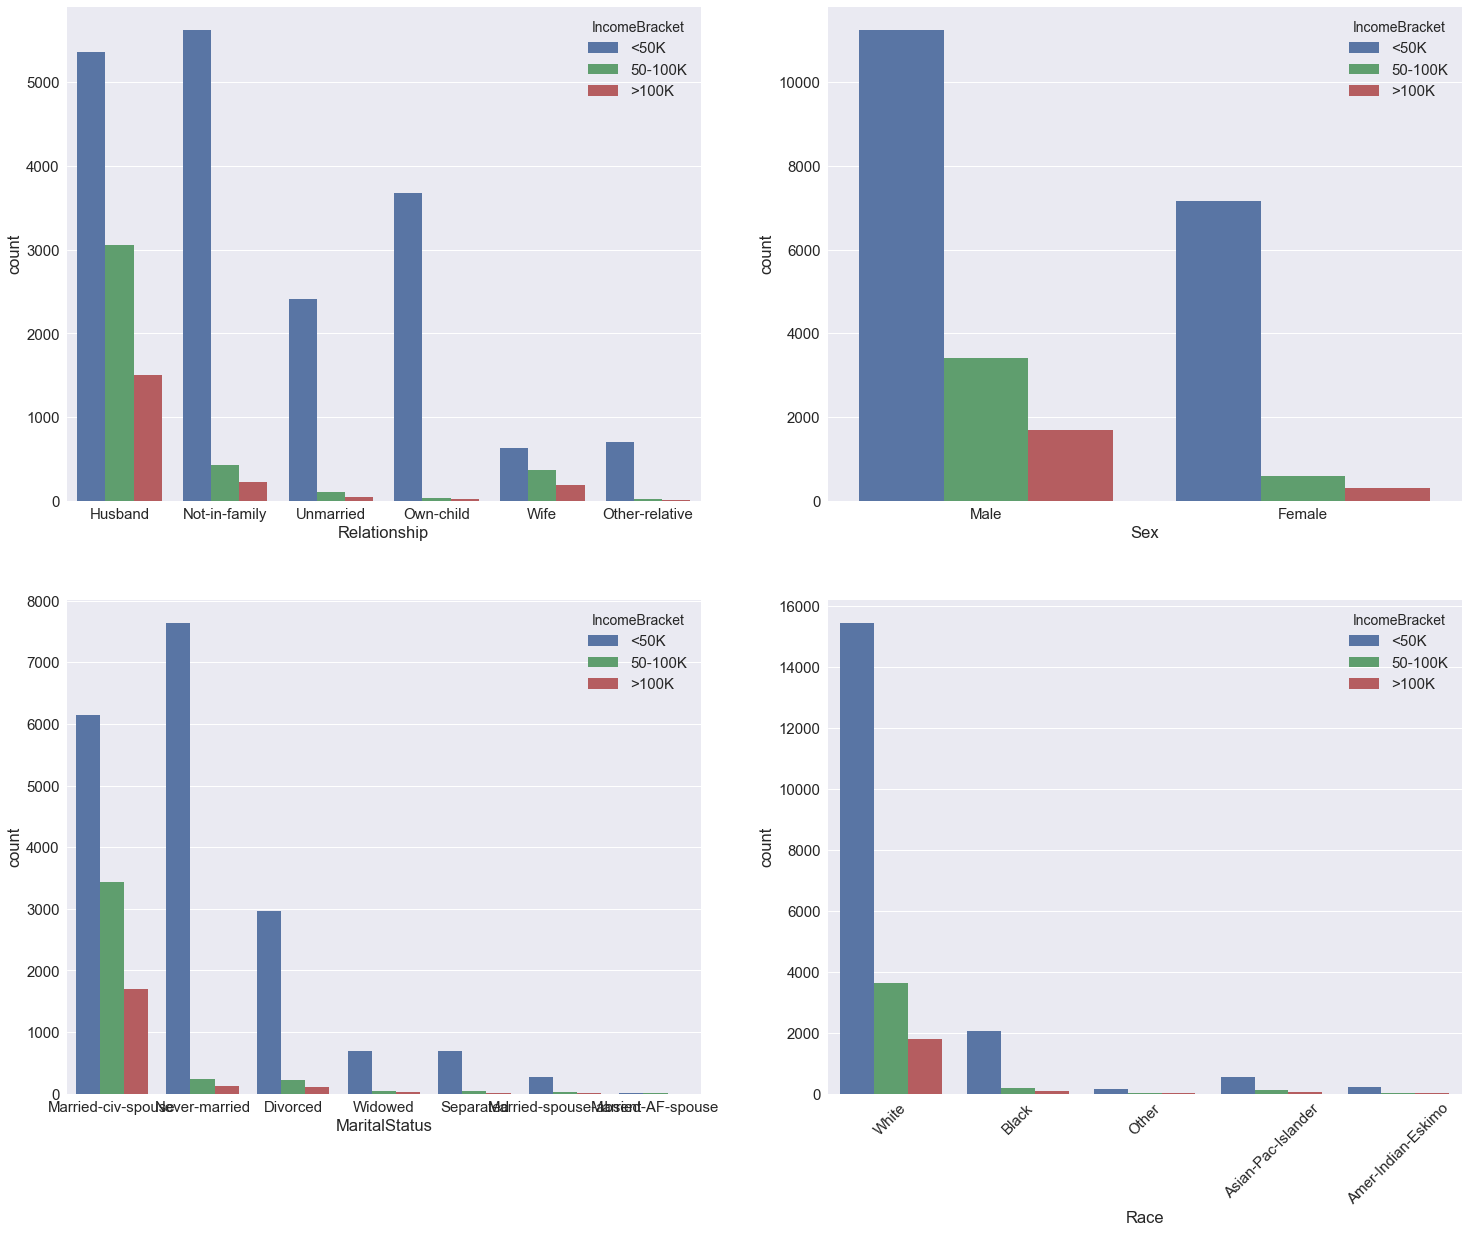

In [229]:
#fig, ((a,b),(c,d),(e,f)) = plt.subplots(2,2,figsize=(25,30))
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(25,20))
plt.xticks(rotation=45)
#plt.set_xticklabels(labels, rotation='vertical')
sns.set(font_scale=1.5)
#sns.countplot(df_train['Education'],hue=df['IncomeBracket'],ax=a)
sns.countplot(df_train['Relationship'],hue=df['IncomeBracket'],ax=a)
sns.countplot(df_train['MaritalStatus'],hue=df['IncomeBracket'],ax=c)
sns.countplot(df_train['Race'],hue=df['IncomeBracket'],ax=d)
sns.countplot(df_train['Sex'],hue=df['IncomeBracket'],ax=b)
#sns.countplot(df_train['WorkClass'],hue=df['IncomeBracket'],ax=e)

#### Insights:
In the above plots, For Marital Staus we can see that in Never Married , Divorced & Widowed Marital status people mainly fall in <$50K and very few percentage among them are in other two income classes.

So, We can Bin these categories like Unmaaried, Married etc. so as to reduce Number of variables in this category to improve the Model accuracy in the later parts.

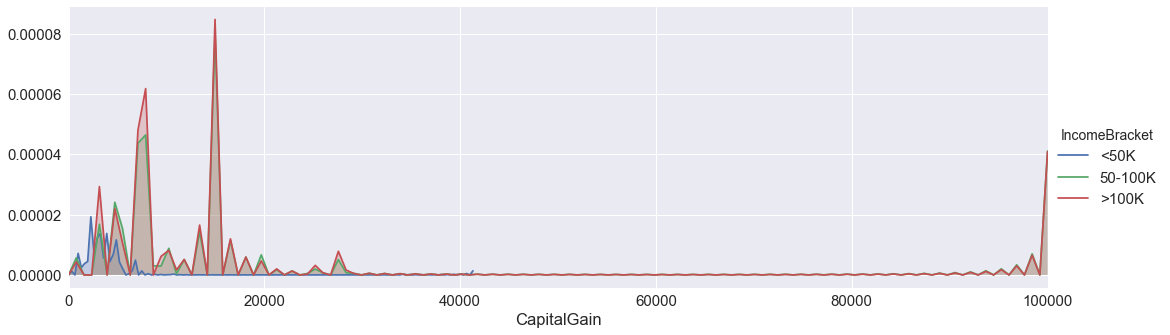

In [230]:
facet = sns.FacetGrid(df_train, hue="IncomeBracket",aspect=3,size=5)
facet.map(sns.kdeplot,'CapitalGain',shade= True)
facet.set(xlim=(0, df_train['CapitalGain'].max()))
facet.add_legend()

#### Insights:
Above plot shows us that less than 50K income people have less capital gain in general. And People with income bracket >$100K   and $50-100K have more capital gains. This shows the importance of this parameter for Income classification

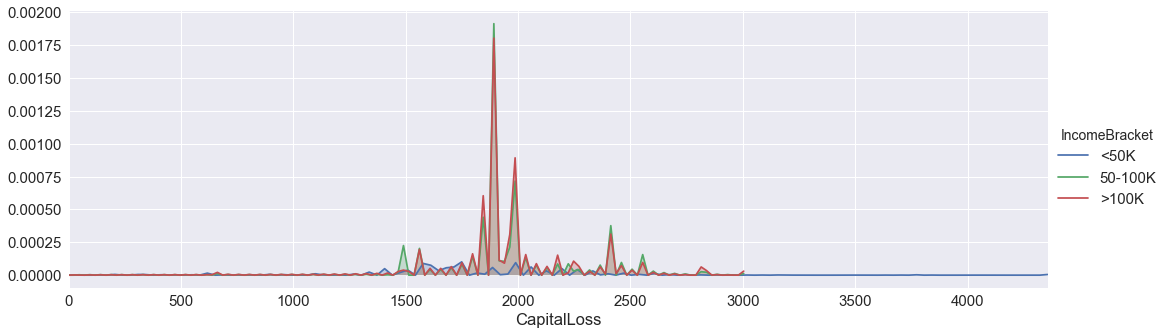

In [234]:
facet = sns.FacetGrid(df_train, hue="IncomeBracket",aspect=3,size=5)
facet.map(sns.kdeplot,'CapitalLoss',shade= True)
facet.set(xlim=(0, df_train['CapitalLoss'].max()))
facet.add_legend()

#### Insights:

Unlike Capital Gain in previous plot, we can see here that it is almost evenly present among all Income category people. This shows that this is not that Prominent feature as compared with Capital Gain for predicting Incomes.

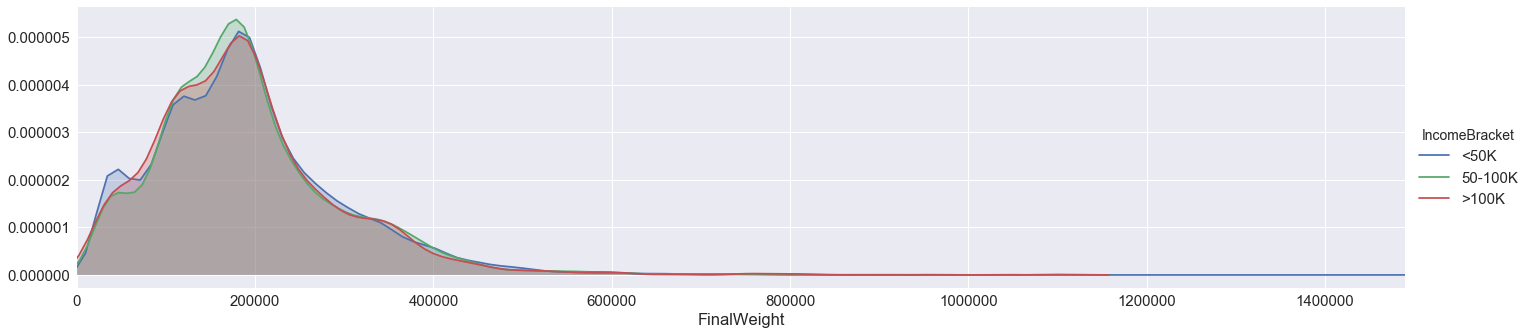

In [231]:
facet = sns.FacetGrid(df_train, hue="IncomeBracket",aspect=4,size=5)
facet.map(sns.kdeplot,'FinalWeight',shade= True)
facet.set(xlim=(0, df_train['FinalWeight'].max()))
facet.add_legend()

#### Insights:
Above distribution for Final weights for three Income Categories are almost similar which shows the weak predictibility power of this feature. Further since this Distribution is highly skewed we can Normalize or Bin the values which is discussed in later parts.

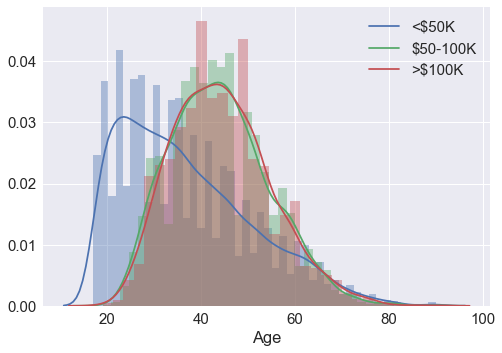

In [232]:
sns.distplot(df_train[df_train['IncomeBracket'] == '<50K']['Age'], kde_kws={"label": "<$50K"})
sns.distplot(df_train[df_train['IncomeBracket'] == '50-100K']['Age'], kde_kws={"label": "$50-100K"})
sns.distplot(df_train[df_train['IncomeBracket'] == '>100K']['Age'], kde_kws={"label": ">$100K"})

#### Insights:
Above Age distributions for three Income Categories shows that for <25 or 30 Age bracket they are mostly in <$50K income range only. And Since other two Income categories are almost similar we can Bin this Data as Age with less tha 30 etc. so as to improve the Model predictive power.

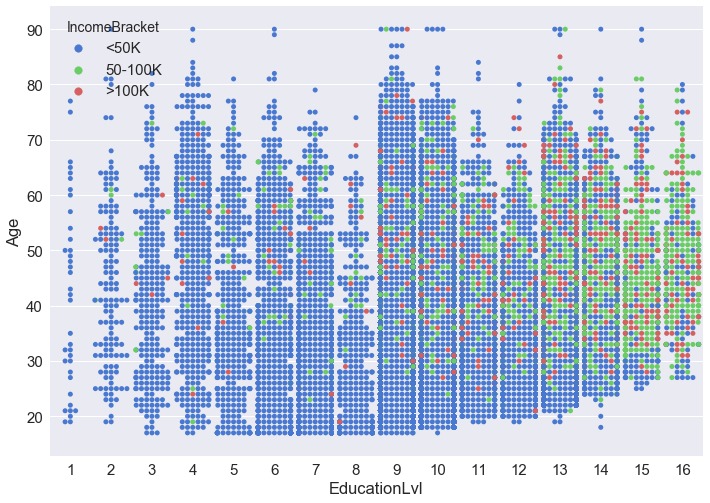

In [233]:
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize= dims)
sns.swarmplot(x='EducationLvl', y='Age', data=df_train, hue='IncomeBracket', size = 5,palette ='muted',ax=ax)

#### Insights:
Above Swarm plot plot shows relation between Education level, Age and Income Categories. It clearly visualizes that most of the 50-100K and >100K income category people are of Education level more than 12.

And one more interesting observation is that More aged people have Education levels either 4/5 or around 9/10 which shows that Most of the elederly people dropped out of their Education in Primary (Class 5) or at Class 10 (Metriculation Level)

### Correlation Plot:

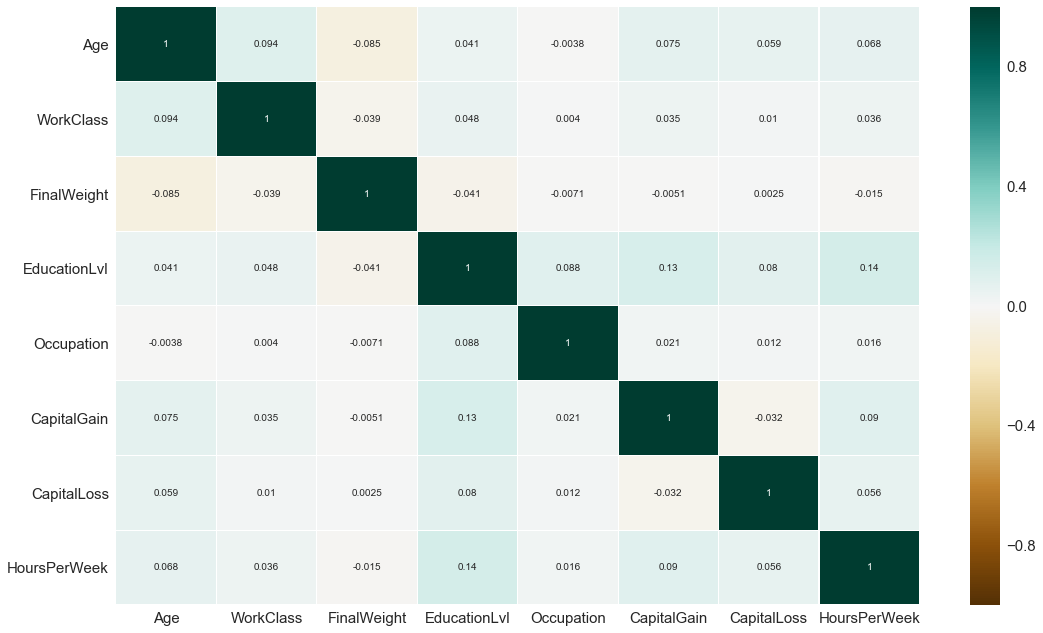

In [1011]:
f,ax = plt.subplots(figsize=(18, 11))
sns.heatmap(df_train.corr(), cmap = "BrBG",annot=True, linewidths=.1,ax=ax)

From the above correlation  plot we can say that since None of the values is near to 1 implies that No two Parameters are Strongly correlated. Importanace of the different features is further discussed below

### Feature Generation & Selection:

#### Updating Marital Status feature:

From the Exploration Bar plot for Marital Status we observed that People falling under Married or Not Married Categories can be generalized and any on the variable in this category is also not showing High Prediction for  Income Categories. Therefore, we can Bin them and Change this Marital Status Feature to reduce number of variables and improve accuracy of Model.

In [1041]:
def Change_MaritalStatus(x):
    x.replace('Married-civ-spouse', 'Married',inplace=True)
    x.replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
    x.replace(['Never-married'], 'NotMarried',inplace=True)
    x.replace(['Divorced'], 'Separated',inplace=True)
    x.replace(['Separated'], 'Separated',inplace=True)
    x.replace(['Married-AF-spouse'], 'Married',inplace=True)
    x.replace(['Widowed'], 'Widowed',inplace=True)
    return x

In [1042]:
df_train['MaritalStatus'] = Change_MaritalStatus(df_train['MaritalStatus'])
df_test['MaritalStatus'] = Change_MaritalStatus(df_test['MaritalStatus'])

#### Log Transforming Final weight feature:

Since from the Distribution plot of Final weight we observed it to be Highly Skewed, Hence it is changed by applying Log transformation to it so as to decrease the data SKewness

In [1043]:
df_train['FinalWeight'] = np.log((1+ df_train['FinalWeight']))
df_train['FinalWeight'] = np.array(np.floor(np.array(df_train['FinalWeight']*100) / 10.))

df_test['FinalWeight'] = np.log((1+ df_test['FinalWeight']))
df_test['FinalWeight'] = np.array(np.floor(np.array(df_test['FinalWeight']*100) / 10.))

#### Log Transforming Final Capital Los and Gain features:

Since the range of these values is also very high, they are Log transformed and decrease the Range and Improve Model Accuracy

In [1044]:
df_train['CapitalLoss'] = np.log((1+ df_train['CapitalLoss']))
df_test['CapitalLoss'] = np.log((1+ df_test['CapitalLoss']))

In [1045]:
df_train['CapitalGain'] = np.log((1+ df_train['CapitalGain']))
df_test['CapitalGain'] = np.log((1+ df_test['CapitalGain']))

#### Creating New feature:

Generally, We can observe that People with High Age and who work for more Hours fall in Middle income or High Income Categories. Hence a new feature is created by Multiplying them So as to give an Additional High Weighted Feature for the Model.


It is also observed that after Plotting Feature importance, This New_feature has high weightage when compared to all other features for Predicting the Income Categories.

In [1084]:
df_train['New_Feature'] = (df_train['Age']) * (df_train['HoursPerWeek'])
df_test['New_Feature'] = (df_test['Age']) * (df_test['HoursPerWeek'])

#### Log Transforming Age feature:

Age Feature is Log Trnasformed for the same reason as mentioned above to decrease its Range of values and improve Model Accuracy

In [1047]:
df_train['Age'] = np.log((1+ df_train['Age']))
df_test['Age'] = np.log((1+ df_test['Age']))

In [1048]:
#columns = ['IncomeBracket','NativeCountry','Education']
columns = ['IncomeBracket']
y = df_train['IncomeBracket']
df_train1 = df_train.drop(columns, axis=1)
X = df_train1.apply(LabelEncoder().fit_transform)


start_gb = time.time()

gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(gb_scores.mean()))

end_gb =time.time()
gb_time = (end_gb-start_gb)/60
print('The time taken for the classifier for 10 fold cross validation is ' + str(gb_time))

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.815222967421
The time taken for the classifier for 10 fold cross validation is 0.7418285171190898


### Feature Importance:

#### Univariate feature selection:

This method works by selecting the best features based on univariate statistical tests. It performs chi2 test for different categorical Values to get the Feature weights as done below.

In [1049]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [1050]:
select_feature = SelectKBest(chi2, k=5).fit(X,y)

In [1051]:
print('Score list:', select_feature.scores_)
print('Feature list:', X.columns)

Score list: [  1.11178574e+04   2.61438998e+00   3.29377524e+00   2.34096402e+02
   2.04739269e+03   3.02540062e+03   1.50173934e+02   2.95746174e+03
   2.78215488e+01   3.93853843e+02   2.23246108e+05   3.13970582e+04
   5.17346197e+03   1.42202924e+01   2.60408584e+05]
Feature list: Index(['Age', 'WorkClass', 'FinalWeight', 'Education', 'EducationLvl',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'New_Feature'],
      dtype='object')


From Univariate Statistical method we got different weights for the Variables. This is compared with next recursive feature elimination method for removing the least important Features.

#### Recursive feature elimination:

In random forest classification method there is a feature importances attributes To use feature_importance method, in training data there should not be correlated features. 

Reason for choosing Random Forest:

In random Random forest it chooses features randomly at each iteration (Bagging), therefore we can predict the important features from a random sample which gives better selection when compared to other methods.

1. feature 2 (0.137934)
2. feature 14 (0.136479)
3. feature 0 (0.120872)
4. feature 10 (0.090206)
5. feature 5 (0.081706)
6. feature 6 (0.078613)
7. feature 4 (0.074724)
8. feature 12 (0.067735)
9. feature 7 (0.051358)
10. feature 1 (0.043744)
11. feature 3 (0.039942)
12. feature 11 (0.027548)
13. feature 13 (0.019484)
14. feature 8 (0.015896)
15. feature 9 (0.013759)


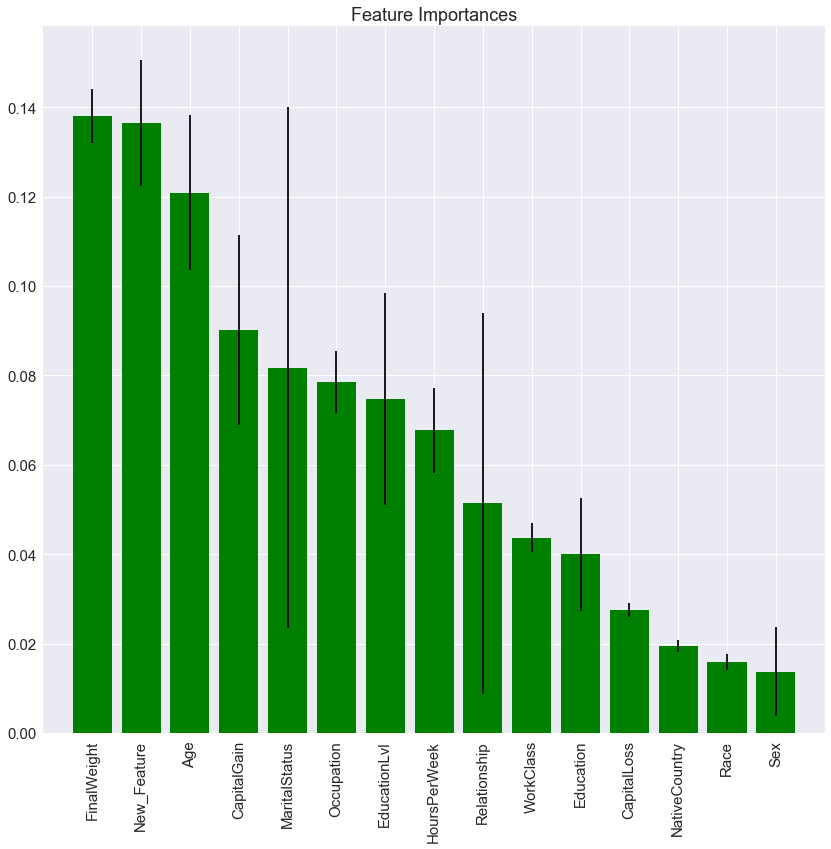

In [1052]:
rcf = RandomForestClassifier()      
rcf = rcf.fit(X,y)
importances = rcf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rcf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Removing Features:

From the above plot, we can say that Native Country, Race and Sex are three least important features. 

From Exploratory Analysis also we observed that Race, Sex and Native Country are very weakly explaing the distribution of three Income Categories

Hence these three features are removed for building the model.

(Features removed so as to Reduce the the Dimensionality of the model which decreases the COmputaional time and increases the ACcuracy)

### Model implementation:

Preparing Data for implementing the Models:

In [1053]:
columns = ['IncomeBracket','Race','Sex', 'NativeCountry']
y = df_train['IncomeBracket']
df_train = df_train.drop(columns, axis=1)
X = df_train.apply(LabelEncoder().fit_transform)

### KNeighborsClassifier:

K Nearest Neighbors basically classifies Data by finding the nearest data points to it measured by a distance function and then it  assigns to the class which is most common amongst its K nearest neighbors

#### Pros & Cons:

Since it works on similaity measures it can Easily handle multi-class cases, hence this model is selected. 


Since there is No generalization in this Algorithm so the Accuracy of model totally depends on the Accuracy, In our case since we have a good Training set we acheived a good accuracy of 77.2%

In [1054]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [1055]:
knn_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print('The accuracy of the knn classifier with 10 fold cross-validation is ' + str(knn_scores.mean()))

The accuracy of the knn classifier with 10 fold cross-validation is 0.772227056475


In [1056]:
print(knn_scores)

[ 0.77067977  0.75993445  0.77509218  0.77613776  0.76793768  0.76301763
  0.77613776  0.77326773  0.77613776  0.78392784]


In [1057]:
knn_cv_mean = np.mean(knn_scores)
knn_cv_variance = np.var(knn_scores)

print('Knn Mean score : ', knn_cv_mean)
print('Knn Score variance : ', knn_cv_variance)

Knn Mean score :  0.772227056475
Knn Score variance :  4.48795549656e-05


### Logstic Regression:

Genreally Logistic Regression is used for Binary classifications (Sigmoid function gives probability of the two classes betweetn 0 and 1. For Multiclass predictions it works on different method like first predicting for two classes and then for other. This method is choosed so as to check its accuracy and understand whether it is giving more or less than Zero R model which is discussed before

#### Pros & Cons:

As discussed above, In Multiclass Classifications its accuracy might be low when compared to other algorithms which is also seen below. But being a simple algorithm it is compuationally faster and faster to tune by hyper parameters

In [1058]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

In [1059]:
logreg_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print('The accuracy of the logistic Regression classifier with 10 fold cross-validation is ' + str(logreg_scores.mean()))

The accuracy of the logistic Regression classifier with 10 fold cross-validation is 0.670781942026


In [1060]:
print(logreg_scores)

[ 0.66420966  0.6550594   0.6628431   0.66338663  0.63837638  0.68306683
  0.66707667  0.65764658  0.67855679  0.73759738]


In [1061]:
logreg_cv_mean = np.mean(logreg_scores)
logreg_cv_variance = np.var(logreg_scores)

print('logreg Mean score : ', logreg_cv_mean)
print('logreg Score variance : ', logreg_cv_variance)

logreg Mean score :  0.670781942026
logreg Score variance :  0.000632016491034


#### Multinomial Naive Bayesian:

Naive Bayesian considers all the features for predicting the class by calculating Probablity  of any occurance based on prior probablility of occuance of the events. Since the main assumption for this Model is that Features are independent and also in our case most of our features are almost independent I choosed this algorithm

#### Pros & Cons:
This Model is compuationally observed to very fast when compared to other Models eventhough for large set of Data. But the predicted accuracy is agian predicted to be very low as previous Logistic Regression case.

In [1062]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [1063]:
NB_scores = cross_val_score(NB, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(NB_scores.mean()))

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.735377864989


In [1064]:
print(NB_scores)

[ 0.73873874  0.72798034  0.73084801  0.73390734  0.73103731  0.73882739
  0.73841738  0.73226732  0.74497745  0.73677737]


In [1065]:
NB_cv_mean = np.mean(NB_scores)
NB_cv_variance = np.var(NB_scores)

print('logreg Mean score : ', NB_cv_mean)
print('logreg Score variance : ', NB_cv_variance)

logreg Mean score :  0.735377864989
logreg Score variance :  2.32465324829e-05


### Random Forest: (Ensemble -  bagging)

Since I was unable to acheive good accuracies by normal Models I opted to use Ensembles, A Bootstrap method. Especially in Random forest, it is a Bagging Model and it works by changing the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation and overall accuracy is high

#### Pros & Cons:
Advantage of this method is we can acheive higher accuracies, but It can also lead to overfitting of the Model which needs to be taken care. Also, Random Forest can handle Missing values, although we repleaced missing values in our case, This Model can be used even with missing values

In [1066]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier() 

In [1067]:
forest_scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(forest_scores.mean()))

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.781449545362


In [1068]:
print(forest_scores)

[ 0.77272727  0.78492421  0.77877919  0.77695777  0.77859779  0.78351784
  0.78392784  0.77777778  0.77285773  0.80442804]


In [1069]:
forest_cv_mean = np.mean(forest_scores)
forest_cv_variance = np.var(forest_scores)

print('forest Mean score : ', forest_cv_mean)
print('forest Score variance : ', forest_cv_variance)

forest Mean score :  0.781449545362
forest Score variance :  7.49323097957e-05


### Gradient Boost: (Ensemble -  Boosting)

It is a similar ensemble algorithm like Random forest, But it works in a iterative manner by selecting and creating one tree after another. In random forest all Decision trees are simultaneously perfomed. But here, We select featues of next iteration tree based on the Error rate and Feature importance obtained in one step

#### Pros & Cons:
Both Bias and Variance can be adjusted by doing hyper paramter tuning in this Ensemble method. So it gives us more flexibilty for tuning the Model and create Bias variance Tradeoff

In [1099]:
gb = GradientBoostingClassifier()

In [1100]:
start_gb = time.time()

gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(gb_scores.mean()))

end_gb =time.time()
gb_time = (end_gb-start_gb)/60
print('The time taken for the classifier for 10 fold cross validation is ' + str(gb_time))

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.81493621652
The time taken for the classifier for 10 fold cross validation is 0.6861991008122762


In [1101]:
print(gb_scores)

[ 0.81244881  0.81892667  0.81523966  0.81836818  0.81303813  0.81590816
  0.80893809  0.81508815  0.81180812  0.8195982 ]


In [1102]:
gb_cv_mean = np.mean(gb_scores)
gb_cv_variance = np.var(gb_scores)

print('gb Mean score : ', gb_cv_mean)
print('gb Score variance : ', gb_cv_variance)

gb Mean score :  0.81493621652
gb Score variance :  1.06048436134e-05


### Comparing all Models:

In [1075]:
classifiers = { }
classifiers['Classifier'] = ['Knn','Logistic Regeression','Naive Bayesian','Random Forest', 'Gradient Boost']
classifiers['Mean'] = [knn_cv_mean, logreg_cv_mean, NB_cv_mean,forest_cv_mean, gb_cv_mean]
classifiers['Variance'] = [knn_cv_variance, logreg_cv_variance, NB_cv_variance,  forest_cv_variance, gb_cv_variance]
classifiers = pd.DataFrame(classifiers)
classifiers

,Classifier,Mean,Variance
0,Knn,0.772227,0.000045
1,Logistic Regeression,0.670782,0.000632
2,Naive Bayesian,0.735378,0.000023
3,Random Forest,0.781450,0.000075
4,Gradient Boost,0.814649,0.000008


#### Choosing the Model:

Among all the Models we can see that Accuracy ( Mean )is very high for Gradient Boosting Model. Also, it is having very low variace which tells us that Model is not Overfitted in this case. Hence I opted GBoost Model as my final Model and Hyper Parameter Tuning is performed for it to further improve its accuracy

#### Model tuning:

Model Tuning is performed by using Grid Serach method. Accuracy is selected as a Scoring parameter in our case. Since other than True Positive or True Negative We are highly concentrating on overall perfomance and Prediction of Model I opted for Accuaracy

In [903]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Tuning for Gradient Boost:

Since lower Learning rates generally give better accuracy, Therefor initially Learning rate is taken as 0.05 and other parameters are hyper tuned individually to find the best Parameters in each case

In [926]:
start_time = time.time()

gb = GradientBoostingClassifier()

param_grid = [
              {'n_estimators': [50,100,125,150]}]


grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best n_estimator found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best n_estimator found for GradientBoosting Classifier:
{'n_estimators': 125}

Scores on training set:
0.812 (+/-0.007) for {'n_estimators': 50}
0.815 (+/-0.007) for {'n_estimators': 100}
0.816 (+/-0.006) for {'n_estimators': 125}
0.816 (+/-0.006) for {'n_estimators': 150}

The hyperparameter tuning took:  286.43361139297485 seconds


###  Tuning max_depth:

In [932]:
start_time = time.time()

gb = GradientBoostingClassifier()

param_grid = [{'max_depth': [3,5,7,9,11,15]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best max_depth found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best max_depth found for GradientBoosting Classifier:
{'max_depth': 5}

Scores on training set:
0.815 (+/-0.006) for {'max_depth': 3}
0.815 (+/-0.005) for {'max_depth': 5}
0.811 (+/-0.007) for {'max_depth': 7}
0.805 (+/-0.005) for {'max_depth': 9}
0.799 (+/-0.009) for {'max_depth': 11}
0.791 (+/-0.007) for {'max_depth': 15}

The hyperparameter tuning took:  4614.317499399185 seconds


### Tuning max_features:

In [940]:
start_time = time.time()

gb = GradientBoostingClassifier(n_estimators= 125, max_depth = 5,learning_rate = 0.1)

param_grid = [{'max_features': [3,5,7,9]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best max_features found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best max_features found for GradientBoosting Classifier:
{'max_features': 5}

Scores on training set:
0.814 (+/-0.007) for {'max_features': 3}
0.815 (+/-0.008) for {'max_features': 5}
0.815 (+/-0.006) for {'max_features': 7}
0.814 (+/-0.007) for {'max_features': 9}

The hyperparameter tuning took:  418.4415879249573 seconds


### Tuning min_samples_split:

In [957]:
start_time = time.time()

gb = GradientBoostingClassifier(n_estimators= 125, max_depth = 5,learning_rate = 0.1,max_features=5)

param_grid = [{'min_samples_split': [500,1000,1250,1500,2000]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best min_samples_split found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best min_samples_split found for GradientBoosting Classifier:
{'min_samples_split': 1250}

Scores on training set:
0.816 (+/-0.005) for {'min_samples_split': 500}
0.816 (+/-0.006) for {'min_samples_split': 1000}
0.817 (+/-0.006) for {'min_samples_split': 1250}
0.816 (+/-0.006) for {'min_samples_split': 1500}
0.816 (+/-0.006) for {'min_samples_split': 2000}

The hyperparameter tuning took:  376.664434671402 seconds


### Tuning for Knn Model:

In [910]:
start_time = time.time()

k_range = list(range(10,201,10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best set of parameters found:
{'n_neighbors': 80}

Scores on training set:
0.772 (+/-0.013) for {'n_neighbors': 10}
0.780 (+/-0.011) for {'n_neighbors': 20}
0.782 (+/-0.009) for {'n_neighbors': 30}
0.782 (+/-0.009) for {'n_neighbors': 40}
0.781 (+/-0.008) for {'n_neighbors': 50}
0.782 (+/-0.008) for {'n_neighbors': 60}
0.781 (+/-0.009) for {'n_neighbors': 70}
0.782 (+/-0.008) for {'n_neighbors': 80}
0.781 (+/-0.008) for {'n_neighbors': 90}
0.781 (+/-0.008) for {'n_neighbors': 100}
0.781 (+/-0.009) for {'n_neighbors': 110}
0.781 (+/-0.010) for {'n_neighbors': 120}
0.780 (+/-0.011) for {'n_neighbors': 130}
0.780 (+/-0.010) for {'n_neighbors': 140}
0.779 (+/-0.011) for {'n_neighbors': 150}
0.779 (+/-0.011) for {'n_neighbors': 160}
0.778 (+/-0.010) for {'n_neighbors': 170}
0.778 (+/-0.011) for {'n_neighbors': 180}
0.777 (+/-0.011) for {'n_neighbors': 190}
0.776 (+/-0.010) for {'n_neighbors': 200}

The hyperparameter tuning took:  686.0284504890442 seconds


### Tuning for Logistic regression:

In [911]:
start_time = time.time()

logreg = LogisticRegression(random_state=0)
param_grid = {'C':np.linspace(0.01, 100, 25)}

grid = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best set of parameters found:
{'C': 12.508749999999999}

Scores on training set:
0.794 (+/-0.008) for {'C': 0.01}
0.797 (+/-0.006) for {'C': 4.1762499999999996}
0.797 (+/-0.006) for {'C': 8.3424999999999994}
0.797 (+/-0.006) for {'C': 12.508749999999999}
0.797 (+/-0.006) for {'C': 16.675000000000001}
0.797 (+/-0.006) for {'C': 20.841249999999999}
0.797 (+/-0.006) for {'C': 25.0075}
0.797 (+/-0.007) for {'C': 29.173750000000002}
0.797 (+/-0.006) for {'C': 33.339999999999996}
0.797 (+/-0.007) for {'C': 37.506249999999994}
0.797 (+/-0.006) for {'C': 41.672499999999992}
0.797 (+/-0.006) for {'C': 45.838749999999997}
0.797 (+/-0.006) for {'C': 50.004999999999995}
0.797 (+/-0.006) for {'C': 54.171249999999993}
0.797 (+/-0.006) for {'C': 58.337499999999999}
0.797 (+/-0.007) for {'C': 62.503749999999997}
0.797 (+/-0.006) for {'C': 66.670000000000002}
0.797 (+/-0.006) for {'C': 70.836250000000007}
0.797 (+/-0.006) for {'C': 75.002499999999998}
0.797 (+/-0.006) for {'C': 79.168750000000003}
0.79

### Tuning for Naive Baysian:

In [916]:
start_time = time.time()

NB = MultinomialNB()

param_grid = [{'alpha': [0.01, 0.1, 1.0]}]

grid = GridSearchCV(NB, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best set of parameters found:
{'alpha': 0.01}

Scores on training set:
0.735 (+/-0.010) for {'alpha': 0.01}
0.735 (+/-0.010) for {'alpha': 0.1}
0.735 (+/-0.010) for {'alpha': 1.0}

The hyperparameter tuning took:  4.502325534820557 seconds


### Testing & Discussion:

Choosen Model with Hyper tuning Parameters

In [1103]:
columns = ['IncomeBracket','Race','Sex', 'NativeCountry']
y_test = df_test['IncomeBracket']
df_train = df_test.drop(columns, axis=1)
X_test = df_train.apply(LabelEncoder().fit_transform)

In [1123]:
gb = GradientBoostingClassifier(n_estimators = 125, learning_rate= 0.05, max_depth= 5, max_features = 5, min_samples_split=1250)

In [1124]:
start_gb = time.time()

gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(gb_scores.mean()))

end_gb =time.time()
gb_time = (end_gb-start_gb)/60
print('The time taken for the classifier for 10 fold cross validation is ' + str(gb_time))

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.815099949497
The time taken for the classifier for 10 fold cross validation is 0.7968922893206278


In [1125]:
gb_cv_mean = np.mean(gb_scores)
gb_cv_variance = np.var(gb_scores)

print('gb Mean score : ', gb_cv_mean)
print('gb Score variance : ', gb_cv_variance)

gb Mean score :  0.815099949497
gb Score variance :  6.86285879587e-06


Over Training accuracy is 81.5%

In [1126]:
gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=5, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=1250, min_weight_fraction_leaf=0.0,
              n_estimators=125, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [1127]:
gb_accuracy = gb.score(X_test, y_test)*100      
gb_accuracy 

79.603213641580581

Over Testing Data accuracy is 79.61 %

It is hece observed that Crossvalidation Training accuracy of the Model and Testing accuracy are almost similar, Which says that the Model is not Overfitted on the Training data. (If it is overfitted then we will get more training accuracy and less accuracy on testing Data)

Also, before Hypertuning we got cross validation score to be 81.48 and after hpertuning it improved only by 0.02 , Hence we can say that Bias is almost same before and after Hypertuning inour case.

If we consider Variance, After Hyper tuning Variance decreased, which says that Model reduced slightly its Overfitting after Hypertuning.

So, We can generalize that Present model is not Biased or Overfitted, Hence to further improve the Accuracu we can Increase the number of Training Data Points or we can use Ensemble of Ensembles ( Like Artificial Neural Networks)

---------------------------------------------------------------------------------------------------------------------------------